In [13]:
import numpy as np
import math
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_classification
from sklearn.neural_network import MLPClassifier as NN
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessClassifier as GPC
from sklearn.gaussian_process.kernels import RBF

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

from main import CFGenerator, plot_decision_boundary

from dijsktra_algorithm import Graph, dijsktra_toall


In [14]:
def get_data():
    t = 1
    t1 = 10 * np.random.random_sample(100 * t) - 0.50
    t0 = np.random.normal(0, 0.40, 100 * t)
    x1 = np.vstack((t0, t1)).T
    y1 = np.ones(100 * t)

    t1 = 6 * np.random.random_sample(100 * t) - 0.50
    t0 = np.random.normal(0, 0.50, 100 * t)
    x2 = np.vstack((t1, t0)).T
    y2 = np.zeros(100 * t)

    mean = [3.50, 8.00]
    sigma = 0.50
    cov = sigma * np.identity(2)
    n3 = 50 * t
    x3 = np.random.multivariate_normal(mean, cov, n3)
    y3 = np.zeros(n3)

    X = np.concatenate((x1, x2, x3), axis=0)
    y = np.concatenate((y1, y2, y3))

    return X, y

In [15]:

np.random.seed(123)

X, y= get_data()
clf = NN(max_iter=1000)
# clf = GPC(1.0 * RBF(1.0))
clf.fit(X, y)

subject = np.array([0.20, 7.25])
clss = 1
X = np.concatenate((X, subject.reshape(1, -1)))
y = np.concatenate((y, [1])).astype(int)

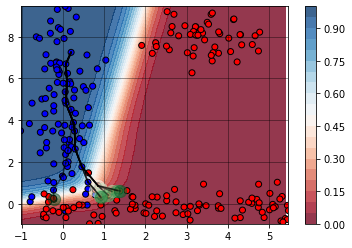

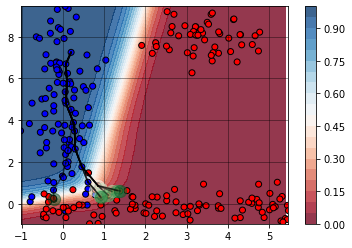

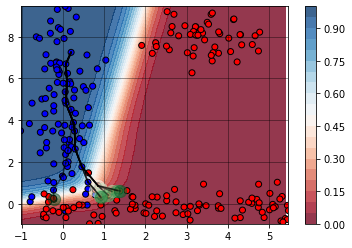

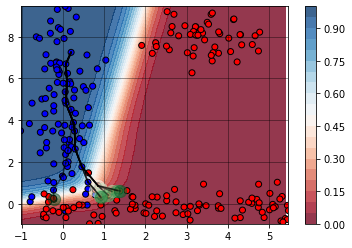

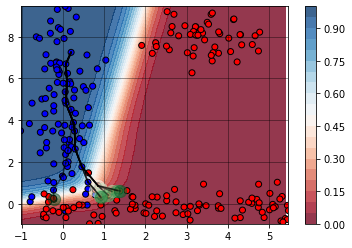

In [41]:


# kde
for dens in np.logspace(-5, -2, 5):
    mdl = CFGenerator(
        method='kde',
        distance_threshold=1,
        density_threshold=dens,
        weight_function= lambda x: -np.log(x),
        howmanypaths=10,
        predictor=clf,
    )

    mdl.fit(X, y)
    starting_point = subject
    target_class = 0
    p=mdl.compute_path(starting_point, target_class)

<AxesSubplot:>

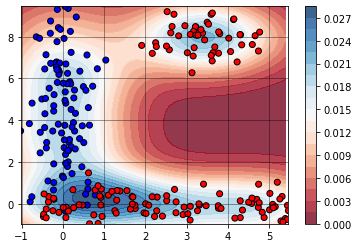

In [26]:
def func(x):
    return np.exp(mdl.density_estimator.score_samples(x))

plot_decision_boundary(X, y, func, 'kde')

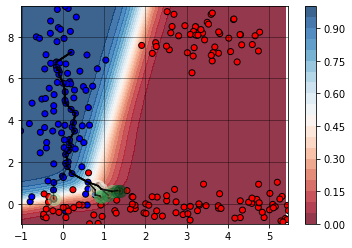

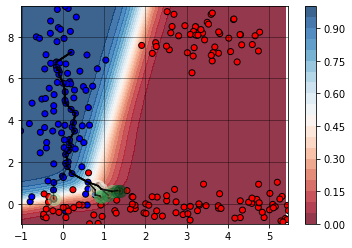

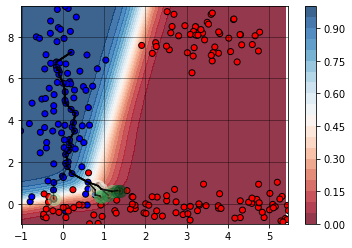

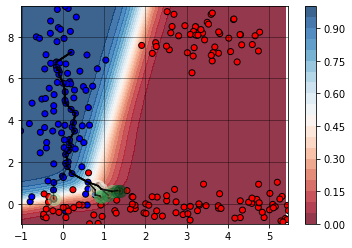

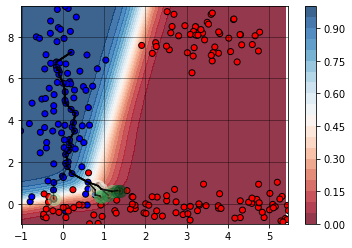

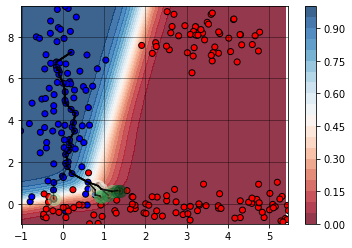

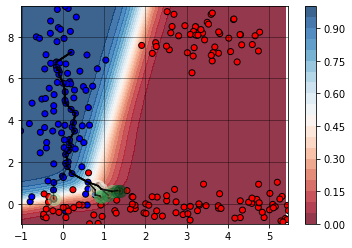

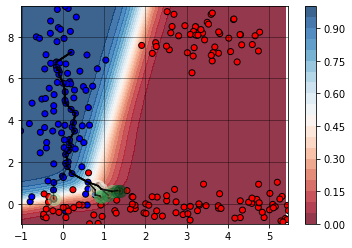

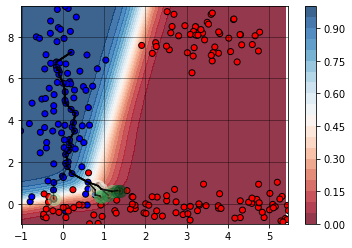

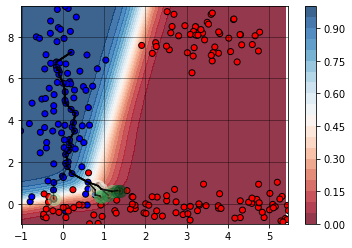

In [39]:
n_neighbours = 20
n_samples, n_features = X.shape

def get_volume_of_sphere(d):
    return math.pi**(d/2)/math.gamma(d/2 + 1)

volume_sphere = get_volume_of_sphere(n_features)
r = (n_neighbours / (n_samples * volume_sphere))
    
# # knn
for alpha in np.linspace(0.01, 5, 10):
    mdl = CFGenerator(
        method='knn',
        weight_function=lambda x: -x*np.log((r/x)**n_features),  #x**alpha,  #
        distance_threshold=1,
        howmanypaths=10,
        n_neighbours=50,
        predictor=clf,
    )

    mdl.fit(X, y)
    starting_point = subject
    target_class = 0
    p=mdl.compute_path(starting_point, target_class)

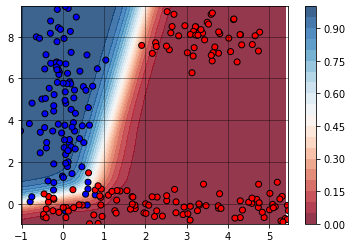

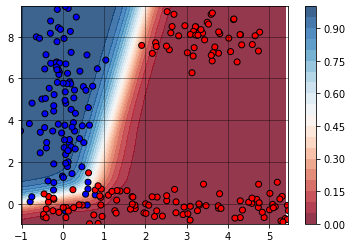

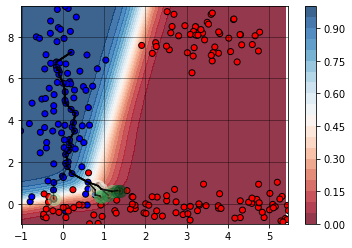

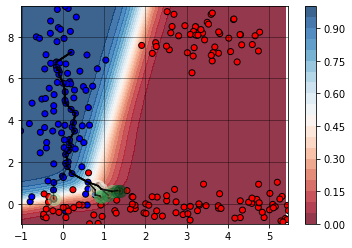

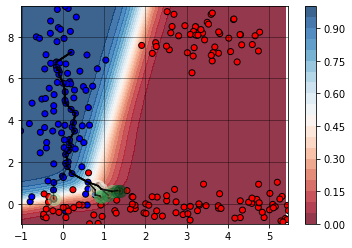

In [20]:

# # e-graph
for epsilon in np.linspace(0.25, 1, 5):
    mdl = CFGenerator(
        method='egraph',
        weight_function=lambda x: -x*np.log((r/x)**n_features),
        epsilon=epsilon,
        distance_threshold=1,
        howmanypaths=10,
        predictor=clf,
    )

    mdl.fit(X, y)
    starting_point = subject
    target_class = 0
    p=mdl.compute_path(starting_point, target_class)